In [5]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

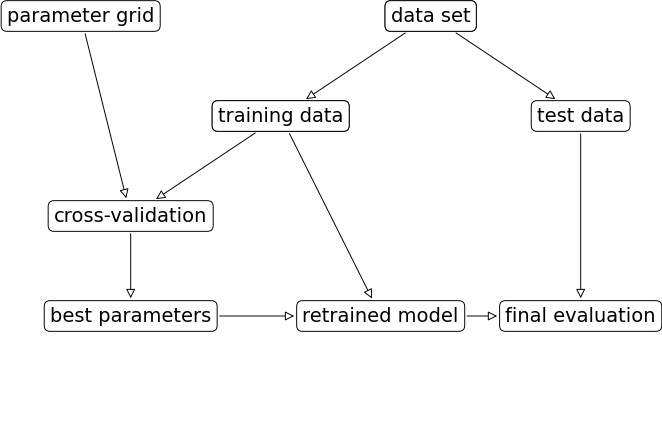

In [3]:
mglearn.plots.plot_grid_search_overview()

In [4]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [6]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [7]:
# Parameter grid, 48 models,
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", 9, None]
}

gs = GridSearchCV(rf, param_grid = param_grid, n_jobs=-1, return_train_score = True)

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [9]:
# Carry out the search 

gs.fit(X_train, y_train)

KeyboardInterrupt: 

In [10]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': 20, 'max_features': 9, 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [11]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.335278,0.201359,0.263805,0.055578,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.872591,0.876043,...,0.874648,0.004341,48,0.880483,0.881202,0.885229,0.883800,0.885381,0.883219,0.002030
1,16.005922,3.142890,0.495982,0.094358,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.881795,0.882370,...,0.880803,0.002510,44,0.890551,0.887315,0.889113,0.889049,0.891709,0.889547,0.001490
2,32.211933,3.066606,0.700459,0.379067,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.877768,0.882657,...,0.880055,0.002747,45,0.888753,0.889760,0.889616,0.891278,0.889336,0.889749,0.000839
3,69.413450,1.917828,1.659872,0.227524,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.879494,0.885534,...,0.882471,0.002648,40,0.890263,0.890335,0.889688,0.890343,0.888473,0.889821,0.000716
4,7.789275,0.343365,0.236474,0.063430,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.878919,0.878343,...,0.879422,0.001347,46,0.893068,0.890407,0.890479,0.890703,0.886532,0.890238,0.002100
5,35.384013,1.764700,0.539997,0.071415,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.884958,0.886109,...,0.885348,0.002131,37,0.894218,0.896879,0.892636,0.895880,0.892284,0.894380,0.001786
6,70.691812,2.105829,0.782190,0.234028,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.881795,0.882657,...,0.883910,0.002952,39,0.894722,0.893931,0.892349,0.892932,0.894657,0.893718,0.000941
7,122.198501,9.269482,0.915832,0.133960,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.882657,0.883808,...,0.885060,0.002598,38,0.894146,0.896519,0.892564,0.896239,0.893651,0.894624,0.001524
8,13.622685,0.875995,0.260496,0.045391,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.872304,0.880357,...,0.878387,0.003992,47,0.886883,0.893931,0.884438,0.888042,0.891493,0.888958,0.003368
9,66.016024,1.805895,0.539785,0.070317,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.876330,0.876043,...,0.882185,0.006455,42,0.888609,0.895153,0.890047,0.897318,0.895880,0.893402,0.003428


Let's look at only the most relevant rows

In [12]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [ ]:
# Best score


# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

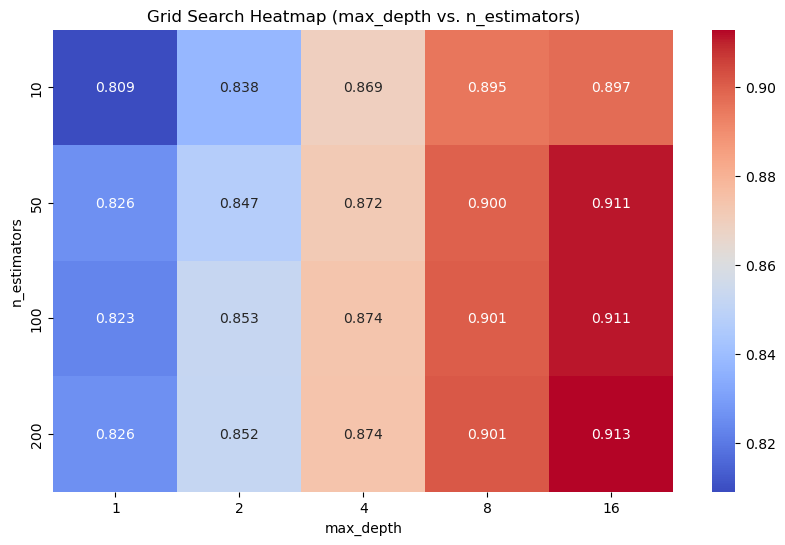

In [14]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()

# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1, 2, 4, 8, 16], 
    "n_estimators": [10, 50, 100, 200]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.